In [0]:
from keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

In [22]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [0]:
trans = ["airplane", "automobile", "bird",
         "cat", "deer", "dog", "frog",
         "horse", "ship", "truck"]

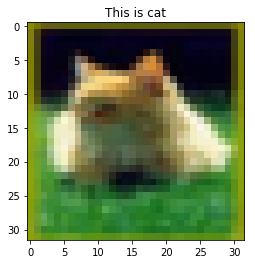

In [24]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
c = random.randint(0, 49999)
plt.title("This is " + trans[y_train[c][0]])
plt.imshow(x_train[c])

In [25]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense, Dropout
cnn = Sequential()
# 1792: 3(filter寬) * 3(filter高) * 3(前面一個像素所有值) * 64(個) + 64(bias)
cnn.add(Conv2D(64, (3, 3), 
               padding="same", 
               activation="relu", 
               input_shape=(32, 32, 3)))
cnn.add(MaxPooling2D())
# 73856: 3 * 3 * 64 * 128 + 128
cnn.add(Conv2D(128, (3, 3), 
               padding="same", 
               activation="relu"))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(256, (3, 3), 
               padding="same", 
               activation="relu"))
cnn.add(MaxPooling2D())
cnn.add(Flatten())
cnn.add(Dense(512, activation="relu"))
cnn.add(Dropout(0.25))
cnn.add(Dense(10, activation="softmax"))
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 4, 4, 256)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4096)             

In [0]:
# 資料預處理
x_train_norm = x_train / 255
x_test_norm = x_test / 255

In [27]:
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print("原本:", y_train[0])
print("後來:", y_train_cat[0])

原本: [6]
後來: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [0]:
cnn.compile(loss="categorical_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])

In [29]:
cnn.fit(x_train_norm, y_train_cat,
        batch_size=200, 
        epochs=10,
        validation_split=0.1, 
        verbose=2)

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
 - 11s - loss: 1.5483 - acc: 0.4361 - val_loss: 1.2541 - val_acc: 0.5614
Epoch 2/10
 - 10s - loss: 1.0833 - acc: 0.6186 - val_loss: 0.9180 - val_acc: 0.6796
Epoch 3/10
 - 10s - loss: 0.8770 - acc: 0.6922 - val_loss: 0.8322 - val_acc: 0.7178
Epoch 4/10
 - 10s - loss: 0.7419 - acc: 0.7418 - val_loss: 0.7096 - val_acc: 0.7558
Epoch 5/10
 - 10s - loss: 0.6368 - acc: 0.7775 - val_loss: 0.6803 - val_acc: 0.7668
Epoch 6/10
 - 10s - loss: 0.5429 - acc: 0.8096 - val_loss: 0.7297 - val_acc: 0.7590
Epoch 7/10
 - 10s - loss: 0.4705 - acc: 0.8352 - val_loss: 0.6820 - val_acc: 0.7726
Epoch 8/10
 - 10s - loss: 0.3895 - acc: 0.8647 - val_loss: 0.6440 - val_acc: 0.7956
Epoch 9/10
 - 10s - loss: 0.3128 - acc: 0.8901 - val_loss: 0.6597 - val_acc: 0.7910
Epoch 10/10
 - 10s - loss: 0.2649 - acc: 0.9074 - val_loss: 0.7262 - val_acc: 0.7916


In [30]:
cnn.evaluate(x_test_norm, y_test_cat)

10000/10000 [==============================] - 2s 159us/step


[0.7722238287448883, 0.7731]

In [32]:
from sklearn.metrics import confusion_matrix
import pandas as pd
base = trans
i = [(str(b) + "(原本)") for b in base]
c = [(str(b) + "(預測)") for b in base]

pre = cnn.predict_classes(x_test_norm)
pd.DataFrame(confusion_matrix(y_test, pre),
             columns=c,
             index=i)

,airplane(預測),automobile(預測),bird(預測),cat(預測),deer(預測),dog(預測),frog(預測),horse(預測),ship(預測),truck(預測)
airplane(原本),869,15,18,3,24,4,17,7,27,16
automobile(原本),18,886,8,3,4,4,9,0,15,53
bird(原本),71,6,663,30,101,35,53,32,7,2
cat(原本),29,9,76,527,91,132,77,40,7,12
deer(原本),14,1,39,21,819,20,28,54,4,0
dog(原本),13,5,52,131,58,648,31,58,3,1
frog(原本),7,3,34,31,42,20,849,6,5,3
horse(原本),11,0,25,14,59,38,7,838,2,6
ship(原本),78,31,10,5,11,5,8,3,834,15
truck(原本),41,75,9,11,9,10,7,20,20,798


In [37]:
y_test.reshape(-1)

array([3, 8, 8, ..., 5, 1, 7])

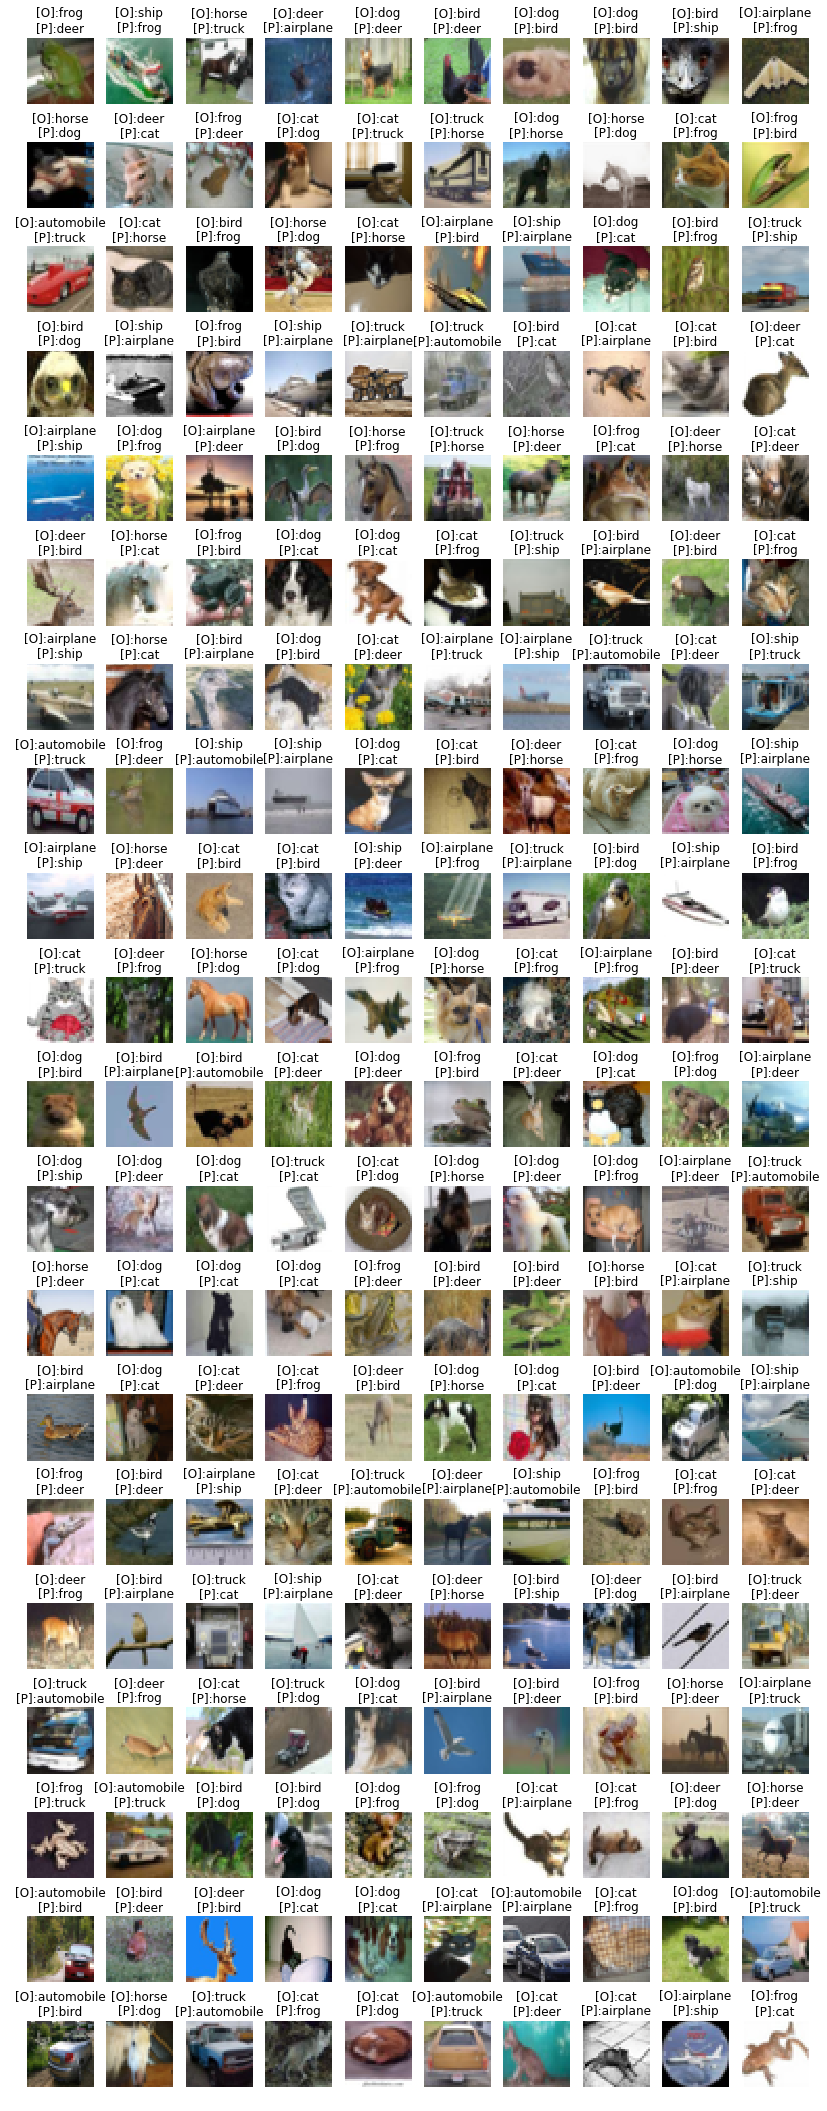

In [39]:
import numpy as np
idx = np.nonzero(pre != y_test.reshape(-1))[0][:200]
# 預測錯誤的圖片
false_img = x_test[idx]
# 預測錯誤圖片的正確答案
false_answer = y_test.reshape(-1)[idx]
# 預測錯誤圖片的預測標籤
false_pre = pre[idx]

width = 10
height = len(false_img) // width + 1
plt.figure(figsize=(14, 40))
for i,img in enumerate(false_img):
    plt.subplot(height, width, i+1)
    t = "[O]:" + trans[false_answer[i]] + "\n[P]:" + trans[false_pre[i]]
    plt.title(t)
    plt.axis("off")
    plt.imshow(img)
